In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv("output.csv")

In [14]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [18]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [20]:
df.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

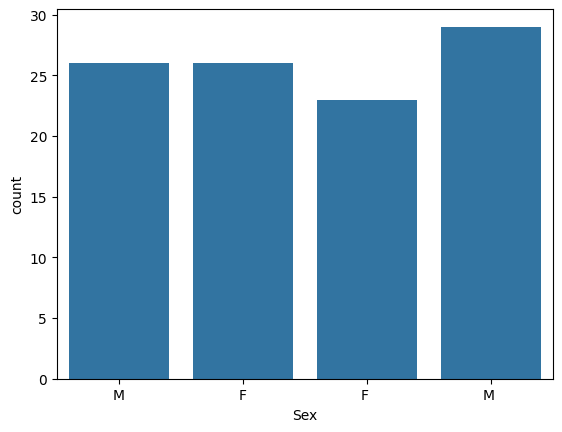

In [24]:
sns.countplot(x = df["Sex"])

In [28]:
df["Sex"].value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [34]:
df[df["Sex"]== "M " ] 
df[df["Sex"]== "F "]

0      False
1      False
2      False
3      False
4       True
       ...  
99     False
100     True
101    False
102     True
103    False
Name: Sex, Length: 104, dtype: bool

In [36]:
df["Sex"] = df["Sex"].replace('M ' , 'M')
df["Sex"] = df["Sex"].replace('F ' , 'F')

In [38]:
df["Sex"].value_counts()

Sex
M    55
F    49
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

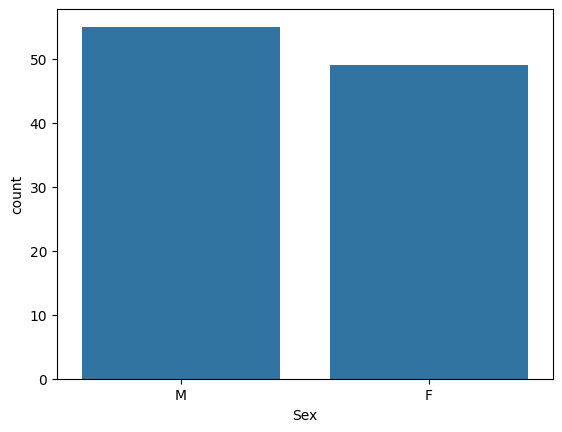

In [40]:
sns.countplot(x = df["Sex"])

<Axes: xlabel='Anaemic', ylabel='count'>

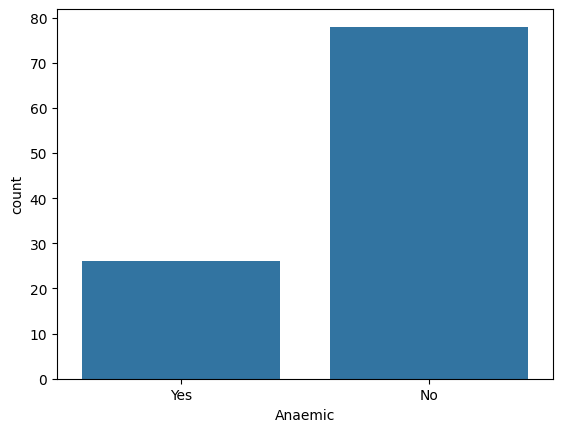

In [45]:
sns.countplot(x = df["Anaemic"])

<Axes: xlabel='Hb', ylabel='Count'>

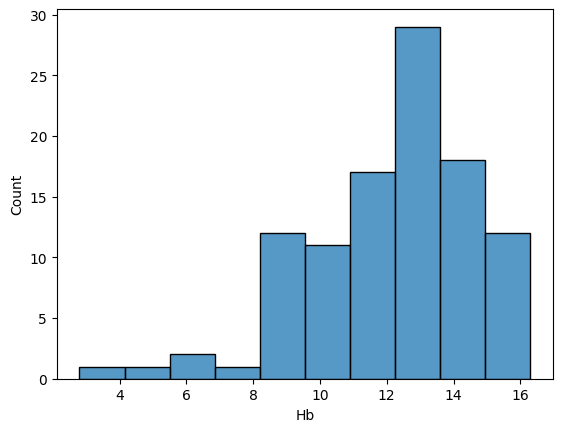

In [51]:
sns.histplot(x = df["Hb" ])

<Axes: xlabel='Hb'>

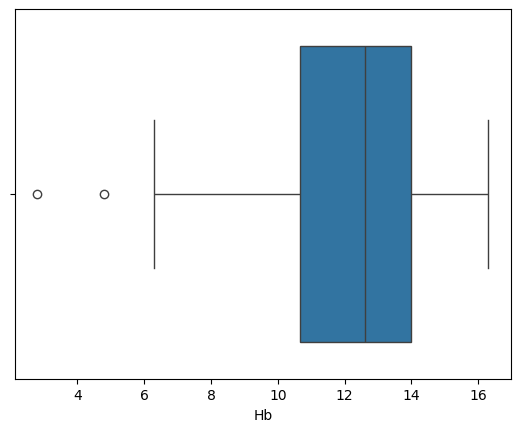

In [53]:
sns.boxplot(x = df["Hb" ])

<Axes: xlabel='%Green pixel', ylabel='%Blue pixel'>

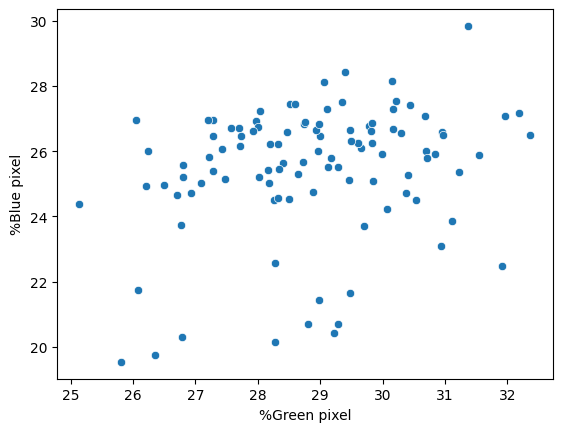

In [69]:
sns.scatterplot(x = df["%Green pixel"] , y = df [ "%Blue pixel"])

In [57]:
encoder = LabelEncoder()

In [59]:
df["Sex"]= encoder.fit_transform(df["Sex"])
df["Anaemic"]= encoder.fit_transform(df["Anaemic"])

In [63]:
df.dtypes

Number            int64
Sex               int32
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic           int32
dtype: object

In [71]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


In [77]:
df = df.drop("Number" , axis=1)

In [79]:
from sklearn.preprocessing import normalize

In [81]:
nor= ["%Red Pixel" , "%Green pixel" , "%Blue pixel" , "Hb" ] 

In [83]:
df[nor] = normalize(df[nor])

In [87]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0.727739,0.518893,0.435789,0.105992,1
1,0,0.745357,0.460748,0.428332,0.220649,0
2,0,0.742070,0.477577,0.429004,0.192892,0
3,0,0.731525,0.476132,0.434750,0.221725,0
4,1,0.716819,0.508336,0.430813,0.205340,0


In [89]:
x = df.drop("Anaemic" , axis = 1)
y = df ["Anaemic"]

In [93]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state=42 , stratify=y , shuffle=True)

In [101]:
from sklearn.linear_model import LogisticRegression

In [109]:
lr = LogisticRegression()

In [111]:
lr.fit(x_train , y_train)

LogisticRegression()

In [113]:
lr.score(x_train , y_train)

0.7435897435897436

In [115]:
lr.score(x_test , y_test)

0.7692307692307693

#### Knn modiling

In [117]:
from sklearn.neighbors import KNeighborsClassifier 

In [119]:
knn = KNeighborsClassifier()

In [121]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [123]:
knn.score(x_train , y_train)

0.9358974358974359

In [125]:
knn.score(x_test , y_test)

1.0

#### Evaluation

In [148]:
from sklearn.metrics import confusion_matrix , precision_score , recall_score

#### Knn pre

In [170]:
y_predict = knn.predict(x_test)

In [172]:
confusion_matrix(y_test , y_predict)

array([[20,  0],
       [ 0,  6]], dtype=int64)

In [174]:
precision_score(y_test , y_predict) , recall_score(y_test, y_predict)

(1.0, 1.0)

#### lr pre

In [178]:
y_predict = lr.predict(x_test)

In [180]:
confusion_matrix(y_test , y_predict)

array([[20,  0],
       [ 6,  0]], dtype=int64)

In [182]:
precision_score(y_test , y_predict) , recall_score(y_test, y_predict)

C:\Users\M\anaconda3\envs\AI\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.0, 0.0)